c:\Users\dougl\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


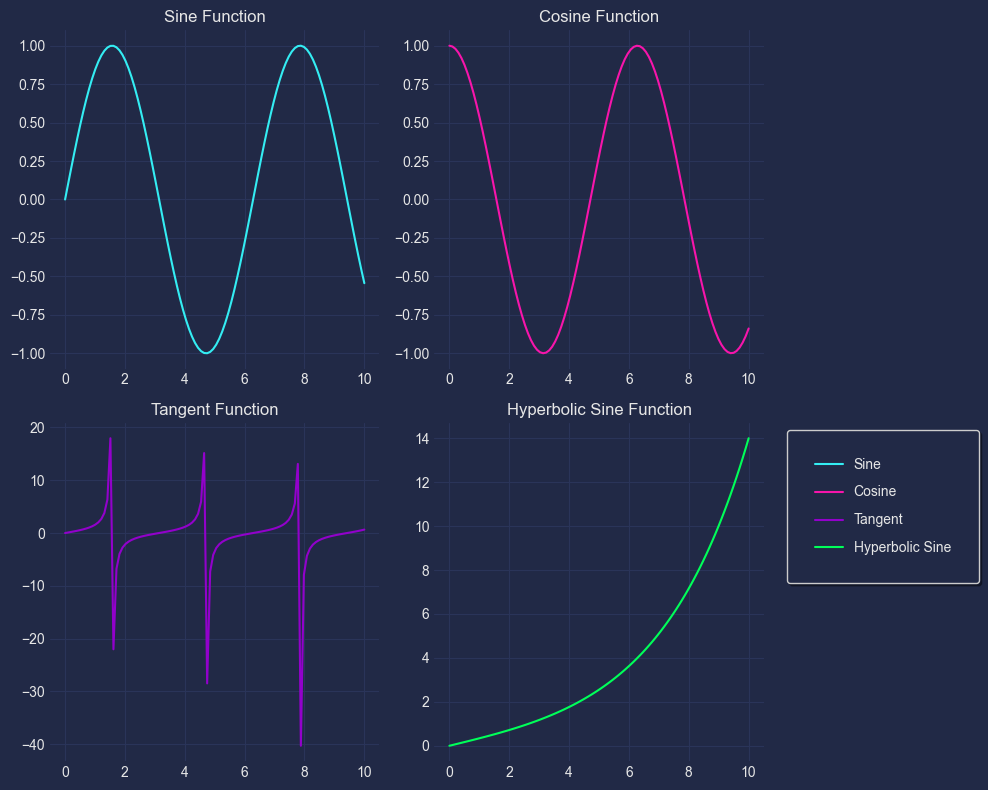

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import kagglehub
import pandas as pd

plt.style.use('cyberpunk')

palette = ['#34EDF3', '#F715AB', '#9201CB', "#00FF59"]
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)
y4 = np.sinh(x / 3)
sin = axs[0, 0].plot(x, y1, color=palette[0])
axs[0, 0].set_title('Sine Function')
cos = axs[0, 1].plot(x, y2, color=palette[1])
axs[0, 1].set_title('Cosine Function')
tang = axs[1, 0].plot(x, y3, color=palette[2])
axs[1, 0].set_title('Tangent Function')
hyp_sin = axs[1, 1].plot(x, y4, color=palette[3])
axs[1, 1].set_title('Hyperbolic Sine Function')
# Add all line objects from all axes to a single legend in axs[0,1]
lines = sin + cos + tang + hyp_sin
labels = ['Sine', 'Cosine', 'Tangent', 'Hyperbolic Sine']
axs[1, 1].legend(lines, labels, shadow = True,frameon = True,bbox_to_anchor=(1.05, 1),borderpad = 2,labelspacing=1,fancybox = True, loc='upper left')
plt.tight_layout()
plt.show()


Regressão Logistica

Matriz de correlação de Pearson:
                     male       age  education  currentSmoker  cigsPerDay  \
male             1.000000 -0.028979   0.017126       0.197596    0.316807   
age             -0.028979  1.000000  -0.163613      -0.213748   -0.192366   
education        0.017126 -0.163613   1.000000       0.018301    0.007962   
currentSmoker    0.197596 -0.213748   0.018301       1.000000    0.766970   
cigsPerDay       0.316807 -0.192366   0.007962       0.766970    1.000000   
BPMeds          -0.052204  0.121980  -0.010607      -0.048632   -0.045826   
prevalentStroke -0.004546  0.057655  -0.035110      -0.032988   -0.032706   
prevalentHyp     0.005313  0.307194  -0.080993      -0.103260   -0.065947   
diabetes         0.015708  0.101258  -0.038146      -0.044295   -0.037063   
totChol         -0.069974  0.260270  -0.022507      -0.046285   -0.026025   
sysBP           -0.035989  0.394302  -0.128260      -0.130230   -0.088505   
diaBP            0.057933  0.206104  -0.061

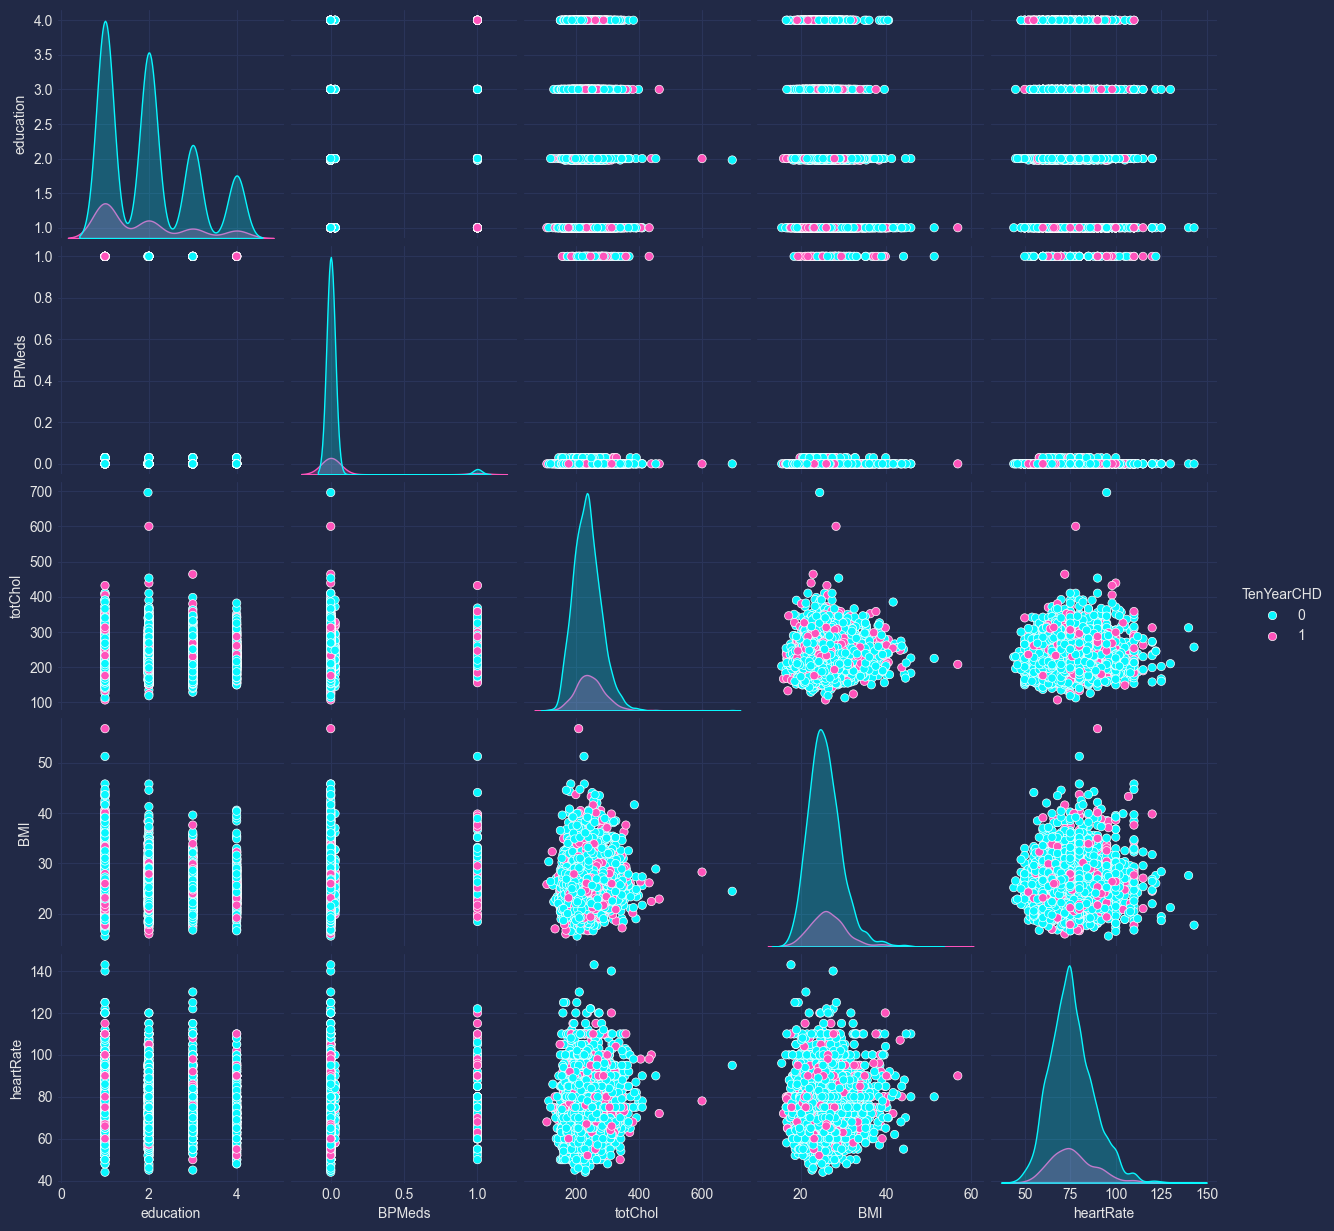

male: 0 - 1
age: 32 - 70
education: 1.0 - 4.0
currentSmoker: 0 - 1
BPMeds: 0.0 - 1.0
prevalentStroke: 0 - 1
prevalentHyp: 0 - 1
diabetes: 0 - 1
totChol: 113.0 - 696.0
BMI: 15.54 - 56.8
heartRate: 44.0 - 143.0


In [32]:
from sklearn.model_selection import train_test_split
from dora import Dora
import seaborn as sns

data_set = pd.read_csv("C:\\Users\\dougl\\.cache\\kagglehub\\datasets\\dileep070\\heart-disease-prediction-using-logistic-regression\\versions\\1\\framingham.csv")
data_set_filtered = data_set.replace(to_replace=np.nan, value=data_set.mean())
# Verificar se a dependiencia estatistica entre variaveis
# Vamos calcular a matriz de correlação de Pearson para as variáveis numéricas
correlation_matrix = data_set_filtered.corr()
print("Matriz de correlação de Pearson:")
print(correlation_matrix)
#Eliminar as que tem correlação maior que 0.5
columns_to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):# So metade da matriz
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname = correlation_matrix.columns[i]
            columns_to_drop.add(colname)

data_set_filtered = data_set_filtered.drop(columns=columns_to_drop)

for col in data_set_filtered.columns:
    print(f"{col}: {data_set[col].dtype} ")


data_set_to_double = data_set_filtered.select_dtypes(include=['float64'])
statician = Dora(data_set_to_double.join(data_set_filtered['TenYearCHD']))
statician.pairplot(hue='TenYearCHD')


# Use stratify to keep the same proportion of classes in train/test
sample, test_data = train_test_split(
    data_set_filtered,
    test_size=0.2,
    random_state=50,
    stratify=data_set_filtered['TenYearCHD']
)


colunas = sample.columns
for col in colunas:
    if col != 'TenYearCHD':
        print(f"{col}: {sample[col].min()} - {sample[col].max()}")


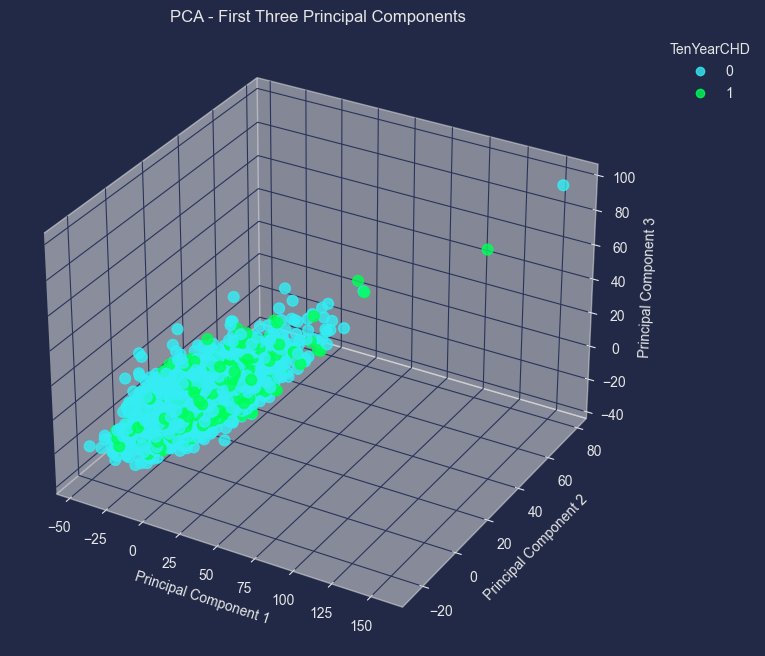

0.9169371496016524
(3390, 11) (848, 11)


In [62]:
from PCA import compute_pca,pca_transform
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
predicted = "TenYearCHD"
colormap = LinearSegmentedColormap.from_list("neon", palette, N= 100)

exclude_target = sample.drop(columns=[predicted])
n = 12
eigenvectors, eigenvalues = compute_pca(exclude_target.values, n_components=n)
transformed_data = pca_transform(exclude_target.values, n_components=n)



# 3D scatter plot using the first three principal components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    transformed_data[:, 0],
    transformed_data[:, 1],
    transformed_data[:, 2],
    c=sample[predicted],
    cmap=colormap,
    s=60,
    alpha=0.8,
)
ax.set_title('PCA - First Three Principal Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title=predicted, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

retained_variance = np.sum(eigenvalues) / len(sample.columns)
print(retained_variance)
#so, 9 features explain 80% of variance
features_that_i_will_use = eigenvectors[:, :n]
sample_reduced = np.dot(exclude_target.values, features_that_i_will_use)
test_data_reduced = np.dot(test_data.drop(columns=[predicted]).values, features_that_i_will_use)
print(sample_reduced.shape, test_data_reduced.shape)

In [ ]:
# Results with Sklearn, but i want to code it from scratch later
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Y = sample[predicted].values
Y_test = test_data[predicted].values

X = sample_reduced
X_test = test_data_reduced

#normalize everything

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=10000, class_weight='balanced')
model.fit(X, Y)
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
confusion = confusion_matrix(Y_test,Y_pred)
print(confusion)
print('Classification Report:')
print(classification_report(Y_test, Y_pred))
#=> The model is just classifying everything as negative 



'''
Confusion Matrix:
[[728   0]
 [  4   0]]
'''
plt.show()


Accuracy: 0.62
Confusion Matrix:
[[438 281]
 [ 41  88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.61      0.73       719
           1       0.24      0.68      0.35       129

    accuracy                           0.62       848
   macro avg       0.58      0.65      0.54       848
weighted avg       0.81      0.62      0.67       848

Accuracy: 0.62


Initial dot product: 0.0
Initial weights: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Execution time: 0.188065 seconds
Optimized weights: [ 0.066921   -0.00677045 -0.06143843 -0.0092717  -0.01868975 -0.01747843
  0.02715009 -0.0108586   0.0384748  -0.0233417  -0.05541686]
[[441 278]
 [ 65  64]]
Custom Logistic Regression Accuracy: 0.60


C:\Users\dougl\AppData\Local\Temp\ipykernel_16244\4028296485.py:131: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


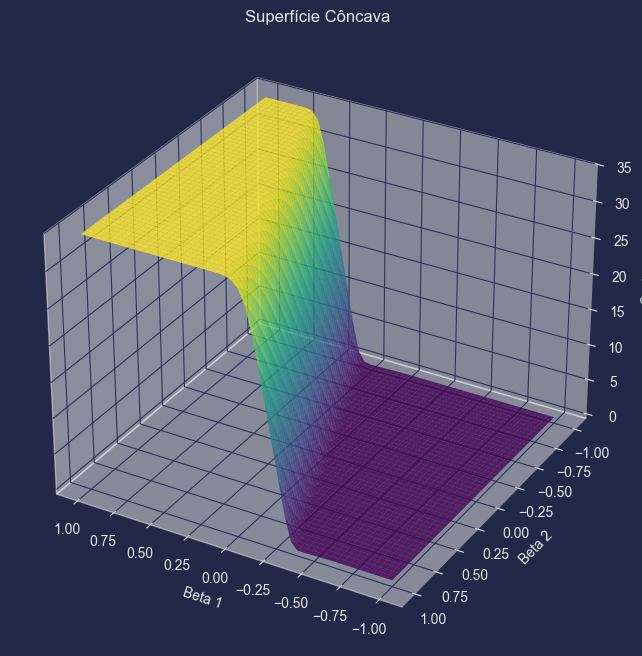

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [101]:
import time
import numpy as np
import matplotlib.pyplot as plt
import tqdm
tol = 1e-9
maxIterations = 1000
#normalize everything
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)



def timer(func):
    def wrapper(*args, **kwargs):
        if kwargs.get('markTime', False):
            start = time.time()
            result = func(*args, **kwargs)
            end = time.time()
            print(f"Execution time: {end - start:.6f} seconds")
            return result
        else:
            return func(*args, **kwargs)
    return wrapper


def GradientDescent(alfa, grad_func, b, verbose=True):
    losses = []
    for i in range(maxIterations):
        g = grad_func(b)
 
      
        g_temp = g.copy()
        if verbose and i % 100 == 0:
            predictions = 1 / (1 + np.exp(-X @ b))
            loss = -np.mean(Y * np.log(predictions + 1e-15) + 
                           (1 - Y) * np.log(1 - predictions + 1e-15))
            losses.append(loss)
        
        if np.linalg.norm(g) < tol :
            print(f"Converged at iteration {i}")
            return b
        
        # Add gradient clipping to avoid exploding weights
        grad_norm = np.linalg.norm(g)
        max_norm =1
        if grad_norm > max_norm:
            g = g * (max_norm / grad_norm)
        
        b -= alfa * g
        if np.linalg.norm(g_temp - g) < tol:
            print(f"Converged at iteration {i}")
    return b
   

class LogisticRegression:
    def __init__(self, X, Y, b0, learning_rate=0.001):
        self.X = X
        self.Y = Y 
        self.alfa = learning_rate
        self.beta = b0

        self.methods = {"Gradient Descent": GradientDescent}

    def inv_Logistic_link(self, theta):
            return 1 / (1 + np.exp(-theta))
    def grad(self, theta):
        predictions = self.inv_Logistic_link(self.X @ theta)
        
        # Calcula class weights
        n_samples = len(self.Y)
        n_classes = 2
        n_class_0 = np.sum(self.Y == 0)
        n_class_1 = np.sum(self.Y == 1)
        
        # Weight inversamente proporcional à frequência
        weight_0 = n_samples / (n_classes * n_class_0)
        weight_1 = n_samples / (n_classes * n_class_1)
        
        # Aplica pesos aos erros
        weights = np.where(self.Y == 1, weight_1, weight_0)
        errors = (predictions - self.Y) * weights
        
        return self.X.T @ errors

    @timer
    def optimize(self, alfa=None, method="Gradient Descent", markTime=False):
        if alfa is None: alfa = self.alfa
        return self.methods[method](alfa, self.grad, self.beta.copy())
    def plot_loss_surface_zoomed(self):
        """Plot loss surface zoomed around the optimum"""
        

        if len(self.beta) != 2:
            print(f"Warning: plotting only first 2 of {len(self.beta)} dimensions")
        
        center1, center2 = self.beta[0], self.beta[1]
        
        # Varia ±5 ao redor do ótimo (não ±40!)
        beta1_range = np.linspace(center1 - 1, center1 + 1, 50)
        beta2_range = np.linspace(center2 - 1, center2 + 1, 50)
        
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        losses = []
        for b1 in beta1_range:
            for b2 in beta2_range:
                beta_temp = self.beta.copy()  # ← mantém outros betas!
                beta_temp[0] = b1
                beta_temp[1] = b2
                
                predictions = self.inv_Logistic_link(self.X @ beta_temp)
                loss = -np.mean(self.Y * np.log(predictions + 1e-15) + 
                            (1 - self.Y) * np.log(1 - predictions + 1e-15))
                losses.append((b1, b2, loss))
        
        losses = np.array(losses)
        X_grid = losses[:, 0].reshape(len(beta1_range), len(beta2_range))
        Y_grid = losses[:, 1].reshape(len(beta1_range), len(beta2_range))
        Z_grid = losses[:, 2].reshape(len(beta1_range), len(beta2_range))
        
        ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', alpha=0.8)
        
        ax.set_xlabel('Beta 1')
        ax.set_ylabel('Beta 2')
        ax.set_zlabel('Custo')
        ax.set_title('Superfície Côncava')
        ax.view_init(elev=30, azim=120)
        ax.legend()
        plt.show()
            
    @classmethod
    def Logistic_link(cls, theta):
        
        epsilon = 1e-15
        theta = np.clip(theta, epsilon, 1 - epsilon)
        return np.log(theta / (1 - theta))
    def calculate_scores(self, X, Y, b):
        '''
        returns a dict of accuracy, precision, recall, f1_score for each class
        '''
        classes = {0:{},1:{}}
        predictions = self.inv_Logistic_link(X @ b)
        predicted_classes = (predictions >= 0.05).astype(int)
        print(predicted_classes)
        for actual, predicted in zip(Y, predicted_classes):
            classes[actual]["predicted"] = predicted
            accuracy = np.mean(predicted_classes == Y)
            recall = np.sum((predicted_classes == 1) & (Y == actual)) / np.sum(Y == actual) if np.sum(Y == actual) > 0 else 0
            precision = np.sum((predicted_classes == actual) & (Y == actual)) /sum(predicted_classes == actual) if np.sum(predicted_classes == actual) > 0 else 0
            f1_score = 2 * (precision * recall) / (precision + recall)

            classes[actual]["accuracy"] = accuracy
            classes[actual]["precision"] = precision
            classes[actual]["recall"] = recall
            classes[actual]["f1_score"] = f1_score
        
     
        return  classes

b_0 = np.zeros(sample_reduced.shape[1])

X = sample_reduced
Y = sample['prevalentStroke'].values
X_test = test_data_reduced

print("Initial dot product:", np.inner(X[0], b_0))
print("Initial weights:", b_0)


model = LogisticRegression(X, Y, b_0, learning_rate=.01)
final_b = model.optimize(markTime=True)

print("Optimized weights:", final_b)

accuracy = accuracy_score(Y_test, model.inv_Logistic_link(X_test @ final_b) >= 0.2)
confusion = confusion_matrix(Y_test, model.inv_Logistic_link(X_test @ final_b) >= 0.2)
print(confusion)
print(f'Custom Logistic Regression Accuracy: {accuracy:.2f}')
model.plot_loss_surface_zoomed()
scores = model.calculate_scores(X_test, Y_test, final_b)
print(scores)